In [3]:
#Step 0: Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
#Step 1: Load the dataset
df = pd.read_csv('Housing.csv')

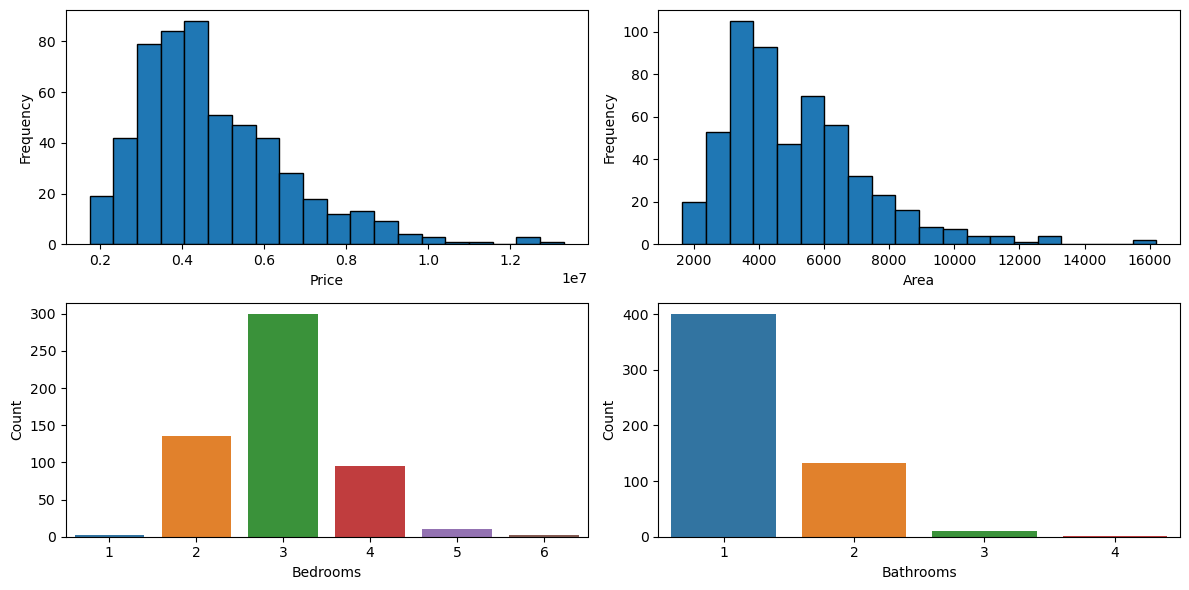

In [26]:
#Perform Univariate Analysis
plt.figure(figsize=(12, 6))

# Histogram of Price
plt.subplot(2, 2, 1)
plt.hist(df['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram of Area
plt.subplot(2, 2, 2)
plt.hist(df['area'], bins=20, edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Frequency')

# Countplot of Bedrooms
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

# Countplot of Bathrooms
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


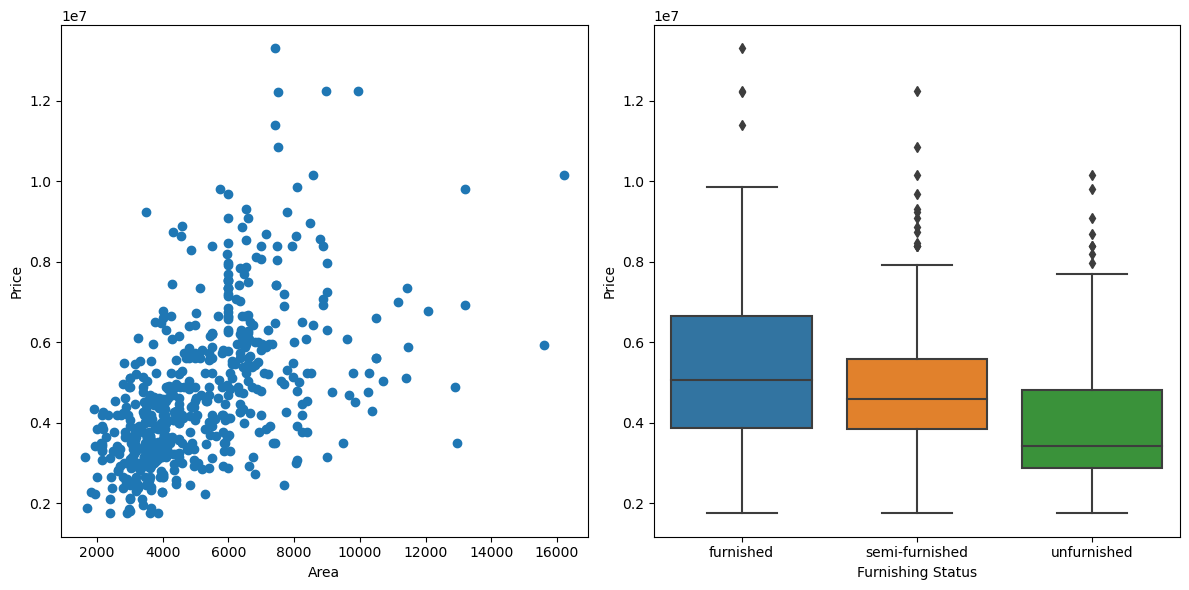

In [10]:
#Step 3: Performing Analysis
#Perform Bivariate Analysis
plt.figure(figsize=(12, 6))

# Scatter plot of Area vs. Price
plt.subplot(1, 2, 1)
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')

# Box plot of Furnishing Status vs. Price
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='furnishingstatus', y='price')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

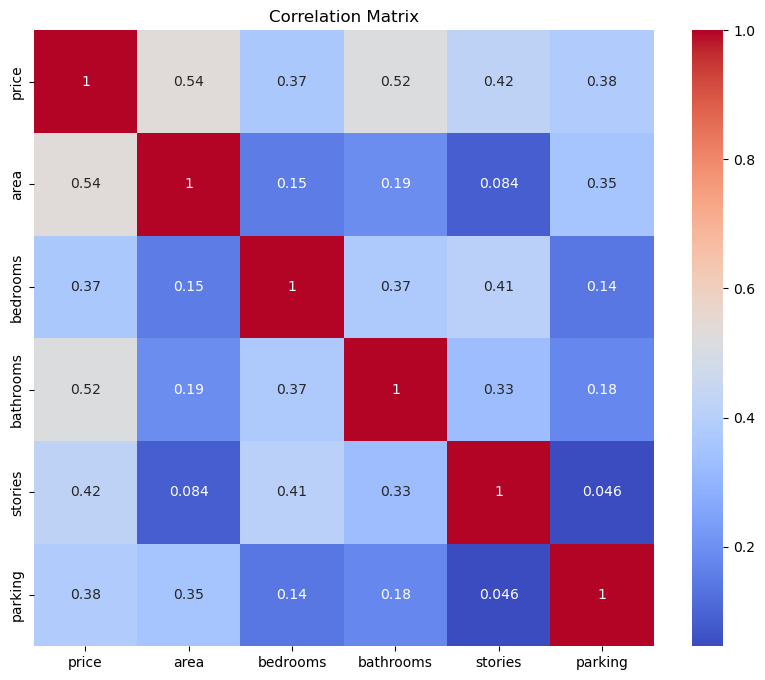

In [11]:
#Perform Multivariate Analysis
plt.figure(figsize=(10, 8))

# Heatmap of correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()

In [12]:
# Step 4: Perform descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [15]:
# Step 5: Check for Missing values and deal with them
missing_values = df.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [16]:
# Step 6: Find and replace outliers - Code not provided

In [17]:
# Step 7: Check for Categorical columns and perform encoding
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [19]:
# Step 8: Split the data into dependent and independent variables
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [20]:
# Step 9: Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Step 10: Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# Step 11: Build the Model
model = LinearRegression()

In [23]:
# Step 12: Train the Model
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Step 13: Test the Model
y_pred = model.predict(X_test)

In [25]:
# Step 14: Measure the performance using Metrics
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1837637189871.706
